In [2]:
import matplotlib.pyplot as plt
import numpy as np

# PDFs

In [28]:
def f(x):
    return 1-x**2

La función $f$ integra 1?

In [29]:
# A mano
n = 10_000
x = np.linspace(-1,1,n)
dx = 2/len(x)
sum(f(x)*dx)


1.3331999866653288

In [30]:
# Otra forma
n = 10_000
x = np.linspace(-1,1,n)
np.trapz(f(x), x)

1.333333319997333

In [31]:
from scipy.integrate import quad
quad(f,-1,1) # Acá no hace falta definir x!

(1.3333333333333335, 1.4802973661668755e-14)

Ploteo de una función

In [34]:
# Esta función sí define una pdf!
def f(x):
    funcion = (1-x**2)
    const_norm = 4/3
    return funcion/const_norm
quad(f,-1,1)

(1.0, 1.1102230246251565e-14)

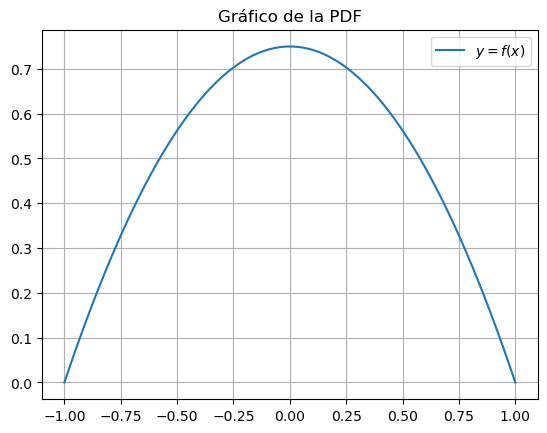

In [35]:
# Generate x and y values for plotting
xmin = -1
xmax = 1
x = np.linspace(xmin, xmax, 400) 
y = f(x)

# Plot the function
fig, ax = plt.subplots()

ax.plot(x, y, label=r'$y = f(x)$')

ax.set_title('Gráfico de la PDF')
ax.legend()
ax.grid(True)
plt.show()

In [36]:
def plot_pdf(f,xmin,xmax,samples = 400):
    x = np.linspace(xmin, xmax, samples) 
    y = f(x)

    # Plot the function
    fig, ax = plt.subplots()

    ax.plot(x, y)

    ax.set_title('Gráfico de la PDF')
    ax.grid(True)
    plt.show()
    return fig


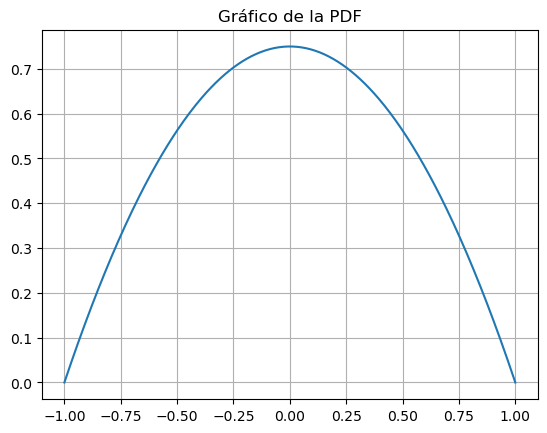

In [37]:
fig = plot_pdf(f,-1,1)

# Distribución normal

$X \sim N(\mu,\sigma) $ 

- **PDF**:

$$f(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

- $\text{E}(X) = \mu$
- $\text{var}(X) = \sigma^2$

In [42]:
import scipy.stats as stats

In [43]:
mu = 10
sigma = 0.5

normal = stats.norm(loc = mu, scale = sigma)

In [44]:
normal

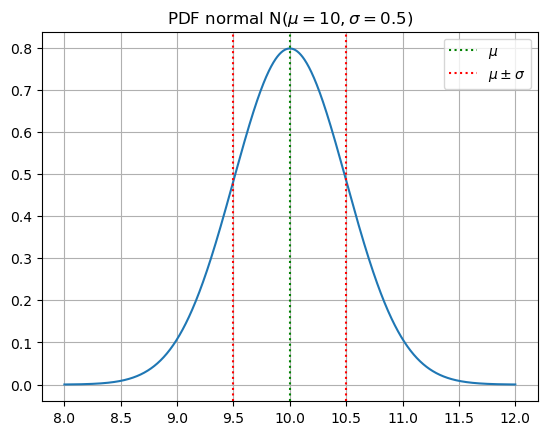

In [45]:
x = np.linspace(8,12,1000)
plt.plot(x,normal.pdf(x))
plt.title(rf'PDF normal N($\mu={mu},\sigma={sigma})$')
plt.axvline(mu,label=r'$\mu$',color='g', ls=':')
plt.axvline(mu-sigma,label=r'$\mu \pm \sigma$',color='r', ls=':')
plt.axvline(mu+sigma,color='r', ls=':')
plt.legend()
plt.grid()

In [46]:
print(normal.cdf(10)) # F(x)
print(normal.pdf(10)) # f(x)

0.5
0.7978845608028654


In [48]:
print(normal.cdf(mu+sigma))
print(normal.cdf(mu+sigma) - normal.cdf(mu-sigma))
print(normal.cdf(mu+2*sigma) - normal.cdf(mu-2*sigma))


0.8413447460685429
0.6826894921370859
0.9544997361036416


### Distribución normal estándar
$\mu = 0 $,  $\sigma = 1$

$Z \sim N(0,1)$

$$ \Phi(z) = F_Z(z) = \int_{-\infty}^{z}\frac{1}{\sqrt{2\pi}}e^{-\frac{t^2}{2}}dt $$

* $\Phi(z)$ está tabulada.


* Si $X \sim N(\mu,\sigma) \Rightarrow Z = \frac{X-\mu}{\sigma} \sim N(0,1) $


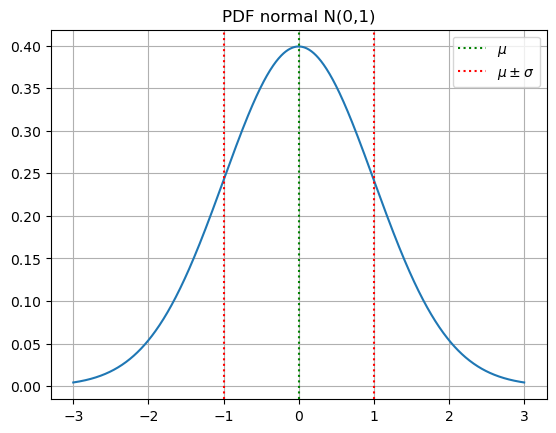

In [49]:
Z = stats.norm

z = np.linspace(-3,3,1000)
plt.plot(z,Z.pdf(z))
plt.title(rf'PDF normal N(0,1)')
plt.axvline(0,label=r'$\mu$',color='g', ls=':')
plt.axvline(-1,label=r'$\mu \pm \sigma$',color='r', ls=':')
plt.axvline(1,color='r', ls=':')
plt.legend()
plt.grid()

In [50]:
print(Z.cdf(0))
print(Z.cdf(1) - Z.cdf(-1))
print(Z.cdf(2) - Z.cdf(-2))

0.5
0.6826894921370859
0.9544997361036416


### Ejercicio 4 (a) y (d) (pizarrón)

In [19]:
#EJ 5
X = stats.norm(loc=5,scale=0.25)
Z = stats.norm

#a
print(X.cdf(5.5)-X.cdf(4.75))
print(Z.cdf(2)-Z.cdf(-1))

#d Percentil
print(0.25*Z.ppf(0.9)+5)

0.8185946141203637
0.8185946141203637
5.32038789138615


# Gráfico de distribución que viene dada por scipy

In [20]:
def plot_pdf_scipy(dist, dist_name):
    """
    Plot PDF and CDF of a distribution already defined in scipy.
    """
    x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 1000)
    pdf = dist.pdf(x)
    median = dist.median()
    mean = dist.mean()
    

    fig, ax = plt.subplots()

    ax.plot(x, pdf, color="k", label='PDF')
    
    ax.axvline(median, color='r', linestyle='--', label=f'median: {median:.2f}')
    ax.axvline(mean, color='m', linestyle='--', label=f'Mean: {mean:.2f}')
    
    ax.grid(True)
    plt.title(f'Gráfico de la PDF de {dist_name}')
    plt.legend()
    plt.show()

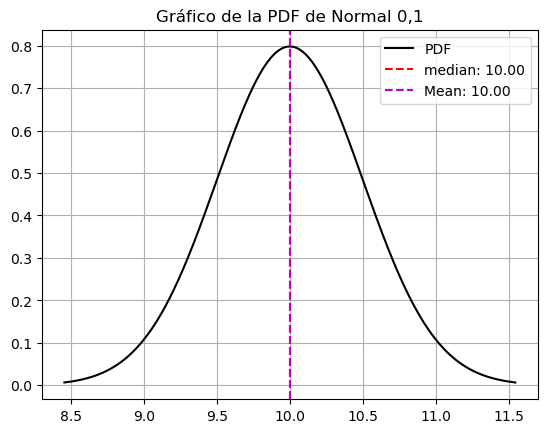

In [21]:
plot_pdf_scipy(normal, "Normal 0,1")

In [22]:
normal.cdf(-1)
normal.ppf(.158)
# El percentil 15,% de la normal está en -1

9.498644167486725

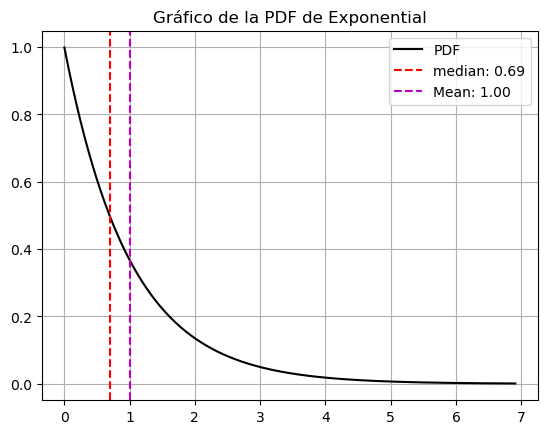

In [23]:
from scipy.stats import expon
plot_pdf_scipy(expon, "Exponential")

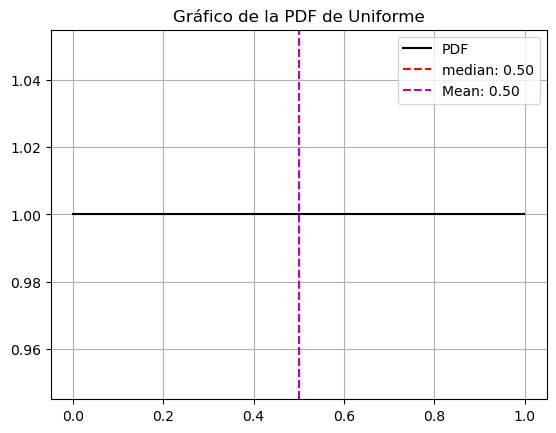

In [24]:
from scipy.stats import uniform
plot_pdf_scipy(uniform, "Uniforme")

# Gráfico de distribución que viene dada por un vector

In [25]:
v = expon.rvs(size=1_000)

In [26]:
np.mean(v) # media de v
np.median(v) # mediana 
np.percentile(v,10) # percentil
np.std(v)

1.0500796870226121

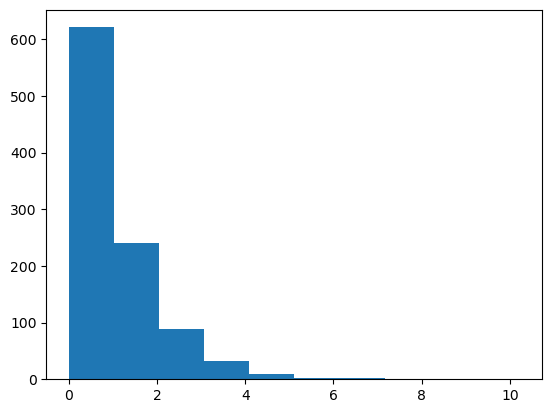

In [27]:
plt.hist(v,bins = 10)
plt.show()